# Machine Learning Master Notes 9 - Multiple Linear Regression and Vectorized Gradient Descent

### Prepare Environment

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm

## Application of Gradient Descent using Matrix Computation

Hypothesis: $$f_{\vec{w},b}(\vec{X}^{(i)})=b + \sum\limits_{j=0}^{n-1} \vec{w}_{j}\vec{X}_{j}^{(i)}$$


Cost Function:	$$J(\vec w, b) = \frac{1}{2m}   \sum\limits_{i=0}^{m-1} (f_{\vec w,b}(\vec{X}^{(i)})-\vec y^{(i)})^{2}$$ 
$$J(\vec w, b) = \frac{1}{2m} \sum\limits_{i=0}^{m-1} \left(\left(b + \sum\limits_{j=0}^{n-1} \vec w_{j} \vec X_{j}^{(i)} \right)-\vec y^{(i)}\right)^{2}$$
$$J(\vec w, b) = \frac{1}{2m} \sum\limits_{i=0}^{m-1} \left(\left(b + \vec X^{(i)} \cdot \vec w \right)-\vec y^{(i)}\right)^{2}$$
$$$$
Gradient Descent Algorithm: $$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  \vec w &= \vec w -  \alpha \frac{\partial J(\vec{w},b)}{\partial \vec{w}}  \; \newline 
 b &= b -  \alpha \frac{\partial J(\vec{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$


Partial Derivatives: $$
\begin{align}
\frac{\partial J(\vec{w}_1,b)}{\partial \vec{w}_1}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w}_1,b}(x_1^{(i)}) - y^{(i)})x_1^{(i)} \\
\frac{\partial J(\vec{w}_2,b)}{\partial \vec{w}_2}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w}_1,b}(x_2^{(i)}) - y^{(i)})x_2^{(i)} \\
... \\
\frac{\partial J(\vec{w}_n,b)}{\partial \vec{w}_n}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w}_1,b}(x_n^{(i)}) - y^{(i)})x_n^{(i)} \\
  \frac{\partial J(\vec{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w},b}(\vec{X}^{(i)}) - y^{(i)}) \\
\end{align}
$$

Partial Derivatives: $$
\begin{align}
\frac{\partial J(\vec{w},b)}{\partial \vec{w}}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w},b}(\vec{X}^{(i)}) - y^{(i)})\vec{X}^{(i)} \\
  \frac{\partial J(\vec{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w},b}(\vec{X}^{(i)}) - y^{(i)}) \\
\end{align}
$$

Full Implementation of Gradient Descent:
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  \vec{w} &= \vec{w} -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b) - y^{(i)})\vec{X}^{(i)}  \; \newline 
 b &= b -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b) - y^{(i)})  \newline \rbrace
\end{align*}$$

### Example

The following training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below. 

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

We will first develop cost function and gradient descent function using traditional loops.

In [2]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]]).reshape((3,4))
y_train = np.array([460, 232, 178]).reshape((3,1))

### Using Loop Function on Gradient Descent for Multiple Features

In [3]:
def cost_function_loopv2(x,y,b,w):
    m = x.shape[0]
    n = w.shape[0]
    sumAll = 0.

    # for each training example
    for i in range(m):

        # Multiply and sum all the features for example i
        sumFeatures = 0
        for j in range(n):
            sumFeatures += w[j] * x[i][j]
        
        fx = sumFeatures + b
        costEachTrainingExample = (fx - y[i]) ** 2
        sumAll += costEachTrainingExample

    return (1 / (2 * m)) * sumAll

In [4]:
def compute_gradient_loopv2(X,y,b,w):
    
    # Total number of data points
    m = X.shape[0]
    n = X.shape[1]

    # Initialization of Variables 
    db = 0
    dw = np.zeros((n,1))
    temp_db = 0
    temp_dw = np.zeros((n,1))

    # For each training examples
    for i in range(m):

        # For each features
        sumFeatures = 0
        # Sum for each features
        for j in range(n):
            sumFeatures += w[j] * X[i][j]
        
        fx = sumFeatures + b
        # Compute partial derivatives of dw
        for j in range(n):
            temp_dw[j] += (fx - y[i]) * X[i][j]
        
        temp_db += (fx - y[i])

            
    
    db = temp_db/m 
    dw = temp_dw/m

    return db, dw

In [5]:
def prediction_fx_loop(X,b,w):
    m = X.shape[0]
    n = X.shape[1]
    y_predict = np.zeros((m,1))
    sumXw  = 0
    for i in range(m):
        sumXw = 0
        for j in range(n):
            sumXw += (X[i][j] * w[j])
        sumXw + b
        y_predict[i] = sumXw + b
    return y_predict

In [6]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618]).reshape([4,1])

In [7]:
first_row = X_train[0].reshape([1,4])
first_row

array([[2104,    5,    1,   45]])

In [8]:
prediction_fx_loop(first_row,b_init,w_init)

array([[459.99999762]])

**Expected Result**: First row of data prediction using init_b and init_w: 460

In [9]:
cost_function_loopv2(X_train,y_train,b_init,w_init)

array([1.55789044e-12])

**Expected Result**: Cost at optimal w : 1.5578904045996674e-12

In [10]:
dj_db, dj_dw = compute_gradient_loopv2(X_train, y_train, b_init, w_init)
dj_db

array([-1.67392515e-06])

In [11]:
dj_dw

array([[-2.72623577e-03],
       [-6.27197263e-06],
       [-2.21745578e-06],
       [-6.92403391e-05]])

<details>
<summary>
    <font size='3'><b>Expected Results</b></font>
</summary>
    <p>
    <ul>
        <li>dj_db at initial w,b: -1.6739251122999121e-06</li>  
        <li>dj_dw at initial w,b: [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]  </li>
    </ul>
    </p>

In [12]:
def compute_gradient_descent_loopv2(X, y, iterations=10000, init_b=0., init_w=0., alpha=0.01, printProgress=False, printProgressRate = 1000):

    # Initialization of variables
    db = 0
    dw = 0

    b = init_b
    w = init_w.copy()
    
    cost_history = []
    w_history = []
    b_history = []

    
    for j in range(iterations):

        # Compute Partial Derivatives
        db, dw = compute_gradient_loopv2(X,y,b,w) 

        b = b - (alpha * db)
        w = w - (alpha * dw)
        
        cost = cost_function_loopv2(X,y,b,w)
        
        cost_history.append(cost)
        w_history.append(w)
        b_history.append(b)

        if printProgress == True:
            if j % printProgressRate == 0:
                print(f"iteration {j}: cost = {cost[0]:.4e}")
    
    print('best w', np.round(w, 4))
    print('best b', np.round(b, 4)) 

    return w, b, cost_history, w_history, b_history

In [13]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618]).reshape([4,1])

In [14]:
initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 1000
alpha = 5.0e-7

In [15]:
w1, b1, cost_history1, w_history1, b_history1 = compute_gradient_descent_loopv2(X_train, y_train, iterations = iterations, init_b=initial_b, init_w = initial_w, 
                                                                                alpha = alpha, printProgress = True, printProgressRate = 100)

iteration 0: cost = 2.5295e+03
iteration 100: cost = 6.9599e+02
iteration 200: cost = 6.9492e+02
iteration 300: cost = 6.9386e+02
iteration 400: cost = 6.9281e+02
iteration 500: cost = 6.9177e+02
iteration 600: cost = 6.9073e+02
iteration 700: cost = 6.8971e+02
iteration 800: cost = 6.8870e+02
iteration 900: cost = 6.8769e+02
best w [[ 0.204 ]
 [ 0.0037]
 [-0.0112]
 [-0.0659]]
best b [-0.0022]


In [16]:
w1

array([[ 0.20396569],
       [ 0.00374919],
       [-0.0112487 ],
       [-0.0658614 ]])

In [17]:
b1

array([-0.00223541])

<details>
<summary>
    <font size='3'><b>Expected Results</b></font>
</summary>
    <p>
    <ul>
        <li>b,w found by gradient descent</li>
        <li>b: -0.00</li>  
        <li>w: [ 0.2   0.0   -0.01 -0.07] </li>
    </ul>
    </p>

In [18]:
X_train

array([[2104,    5,    1,   45],
       [1416,    3,    2,   40],
       [ 852,    2,    1,   35]])

In [19]:
prediction_fx_loop(X_train,b1,w1)

array([[426.18530497],
       [286.16747201],
       [171.46763087]])

**Expected Result**:    
 prediction: 426.19, target value: 460  
prediction: 286.17, target value: 232  
prediction: 171.47, target value: 178 

### Using Vectorized Gradient Descent for Multiple Features

In [20]:
# Cost Function
def cost_function(X,y,b,w):
    '''
    Actual cost function for both single and multiple features
    X = matrix of training data, each training examples in rows (m) and features in column (n), 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    y = m by 1 vector, where m is total number of training examples.
    b = scalar
    w = n by 1 vector, where n is total number of features
    '''
    
    m = X.shape[0]
    fx = (X@w)+b
    lossFunction = (fx - y) ** 2
    RSS = lossFunction.sum()
    cost = (1 / (2 * m)) * RSS

    return cost

In [21]:
# Matrix Computation Beta
def compute_gradient_beta(X,y,b,w):
    
    # total number of features
    n = w.shape[0]

    # Initialization of Variables 
    db = 0
    dw = 0
    temp_db = 0
    temp_dw = 0

    # Matrix computation
    fx = ((X@w) + b)
    temp_dw = (fx - y) * X
    temp_db = (fx - y)
    
    db = temp_db.mean() 
    dw = temp_dw.mean(axis=0).reshape([n,1]) 

    return db, dw

In [22]:
def fx_prediction_beta(X,b,w):
    y_predict = (X@w) + b
    return y_predict

In [23]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]]).reshape([3,4])
y_train = np.array([460, 232, 178]).reshape([3,1])

In [24]:
X_train

array([[2104,    5,    1,   45],
       [1416,    3,    2,   40],
       [ 852,    2,    1,   35]])

In [25]:
y_train

array([[460],
       [232],
       [178]])

In [26]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618]).reshape([4,1])

In [27]:
fx_prediction_beta(X_train[0:1,],b_init,w_init)

array([[459.99999762]])

**Expected Result**: First row of data prediction using init_b and init_w: 460

In [28]:
cost_function_loopv2(X_train,y_train,b_init,w_init)

array([1.55789044e-12])

In [29]:
cost_function(X_train,y_train,b_init,w_init)

1.5578904330213735e-12

**Expected Result**: Cost at optimal w : 1.5578904045996674e-12

In [30]:
dj_db, dj_dw = compute_gradient_beta(X_train, y_train, b_init, w_init)
dj_db

-1.6739251122999121e-06

In [31]:
dj_dw

array([[-2.72623577e-03],
       [-6.27197263e-06],
       [-2.21745571e-06],
       [-6.92403379e-05]])

<details>
<summary>
    <font size='3'><b>Expected Results</b></font>
</summary>
    <p>
    <ul>
        <li>dj_db at initial w,b: -1.6739251122999121e-06</li>  
        <li>dj_dw at initial w,b: [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]  </li>
    </ul>
    </p>

In [32]:
# Matrix Computation Beta
def compute_gradient_descent_beta(X, y, iterations=10000, init_b=0., init_w = None, alpha=0.01, printProgress=False, printProgressRate = 1000):

    # Initialization of variables
    n = X.shape[1]
    
    db = 0
    dw = 0

    b = init_b
    if np.any(init_w) == None:
        w = np.zeros([n,1])
    else:
        w = init_w.copy()
    
    cost_history = []
    w_history = []
    b_history = []

    
    for j in range(iterations):

        # Compute Partial Derivatives
        db, dw = compute_gradient_beta(X,y,b,w)

        b = b - (alpha * db)
        w = w - (alpha * dw)
        
        cost = cost_function(X,y,b,w)
        
        cost_history.append(cost)
        w_history.append(w)
        b_history.append(b)

        if printProgress == True:
            if j % printProgressRate == 0:
                print(f"iteration {j}: cost = {cost:.4e}")
    
    print('best w', np.round(w, 4))
    print('best b', np.round(b, 4)) 

    return w, b, cost_history, w_history, b_history

In [33]:
initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 1000
alpha = 5.0e-7

In [34]:
w2, b2, cost_history2, w_history2, b_history2 = compute_gradient_descent_beta(X_train, y_train, iterations = iterations, init_b=initial_b, init_w = initial_w, 
                                                                              alpha = alpha, printProgress=True, printProgressRate=100)

iteration 0: cost = 2.5295e+03
iteration 100: cost = 6.9599e+02
iteration 200: cost = 6.9492e+02
iteration 300: cost = 6.9386e+02
iteration 400: cost = 6.9281e+02
iteration 500: cost = 6.9177e+02
iteration 600: cost = 6.9073e+02
iteration 700: cost = 6.8971e+02
iteration 800: cost = 6.8870e+02
iteration 900: cost = 6.8769e+02
best w [[ 0.204 ]
 [ 0.0037]
 [-0.0112]
 [-0.0659]]
best b -0.0022


In [35]:
w2

array([[ 0.20396569],
       [ 0.00374919],
       [-0.0112487 ],
       [-0.0658614 ]])

In [36]:
b2

-0.0022354075309325345

<details>
<summary>
    <font size='3'><b>Expected Results</b></font>
</summary>
    <p>
    <ul>
        <li>b,w found by gradient descent</li>
        <li>b: -0.00</li>  
        <li>w: [ 0.2   0.0   -0.01 -0.07] </li>
    </ul>
    </p> 

In [37]:
fx_prediction_beta(X_train,b2,w2)

array([[426.18530497],
       [286.16747201],
       [171.46763087]])

**Expected Result**:    
 prediction: 426.19, target value: 460  
prediction: 286.17, target value: 232  
prediction: 171.47, target value: 178  

In [38]:
%%timeit -r 1 -n 1
compute_gradient_descent_beta(X_train, y_train, iterations = iterations, init_b=initial_b, init_w = initial_w, alpha = alpha)
# timeit do not allow comment on first line, also do not capture return

best w [[ 0.204 ]
 [ 0.0037]
 [-0.0112]
 [-0.0659]]
best b -0.0022
64 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### Additional Testing on Single Features Gradient Descent : Test Case 1

In [39]:
x = np.array([1.,2.,3.],dtype=np.float64).reshape((3,1))
y = np.array([1.,2.,3.],dtype=np.float64).reshape((3,1))

In [40]:
w, b, cost_history, w_history, b_history = compute_gradient_descent_beta(x,y, printProgress=True)

iteration 0: cost = 2.0827e+00
iteration 1000: cost = 8.7712e-04
iteration 2000: cost = 7.9144e-05
iteration 3000: cost = 7.1413e-06
iteration 4000: cost = 6.4437e-07
iteration 5000: cost = 5.8142e-08
iteration 6000: cost = 5.2463e-09
iteration 7000: cost = 4.7338e-10
iteration 8000: cost = 4.2713e-11
iteration 9000: cost = 3.8541e-12
best w [[1.]]
best b 0.0


<details>
<summary>
    <font size='3'><b>Expected Answer</b></font>
</summary>
    <p>
    <ul>
        <li>$w = 1$ and $b = 0$ </li>
    </ul>
    </p>


#### Additional Testing on Single Features : Test Case 2

In [41]:
x2 = np.array([1.0, 2.0]).reshape((2,1))   #features
y2 = np.array([300.0, 500.0]).reshape((2,1))   #target value
best_w, best_b, cost_history, w_history, b_history = compute_gradient_descent_beta(x2,y2,iterations=20000, printProgress=True)

iteration 0: cost = 7.9275e+04
iteration 1000: cost = 3.4125e+00
iteration 2000: cost = 7.9290e-01
iteration 3000: cost = 1.8423e-01
iteration 4000: cost = 4.2805e-02
iteration 5000: cost = 9.9458e-03
iteration 6000: cost = 2.3109e-03
iteration 7000: cost = 5.3694e-04
iteration 8000: cost = 1.2476e-04
iteration 9000: cost = 2.8987e-05
iteration 10000: cost = 6.7352e-06
iteration 11000: cost = 1.5649e-06
iteration 12000: cost = 3.6361e-07
iteration 13000: cost = 8.4484e-08
iteration 14000: cost = 1.9630e-08
iteration 15000: cost = 4.5610e-09
iteration 16000: cost = 1.0597e-09
iteration 17000: cost = 2.4623e-10
iteration 18000: cost = 5.7211e-11
iteration 19000: cost = 1.3293e-11
best w [[200.]]
best b 100.0


<details>
<summary>
    <font size='3'><b>Expected Answer</b></font>
</summary>
    <p>
    <ul>
        <li>$w = 200$ and $b = 100$ </li>
    </ul>
    </p>

#### Additional Testing on Single Features : Test Case 3

In [42]:
x3 = np.array([1,2,3]).reshape((3,1))
y3 = np.array([3,4,5]).reshape((3,1))
best_w, best_b, cost_history, w_history, b_history = compute_gradient_descent_beta(x3,y3)

best w [[1.]]
best b 2.0


<details>
<summary>
    <font size='3'><b>Expected Answer</b></font>
</summary>
    <p>
    <ul>
        <li>$w = 1$ and $b = 2$ </li>
    </ul>
    </p>

## Finalized Vectorized Gradient Descent Function for Single/Multiple Features

In [43]:
# Cost Function
def cost_function(X,y,b,w):
    '''
    Actual cost function for both single and multiple features
    X = matrix of training data, each training examples in rows (m) and features in column (n), 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    y = m by 1 vector, where m is total number of training examples.
    b = scalar
    w = n by 1 vector, where n is total number of features

    Return:
    Cost (scalar)
    '''
    
    m = X.shape[0]
    fx = (X@w)+b
    lossFunction = (fx - y) ** 2
    RSS = lossFunction.sum()
    cost = (1 / (2 * m)) * RSS

    return cost

In [44]:
# Compute Gradient
def compute_gradient(X,y,b,w):
    '''
    Compute gradient for each step size
    X = matrix of training data, each training examples in rows and features in column, 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    y = m by 1 vector, where m is total number of training examples.
    b = scalar
    w = n by 1 vector, where n is total number of features

    Return:
    db (scalar)
    dw (n by 1 vector)
    '''
    
    
    # total number of features
    n = w.shape[0]

    # Initialization of Variables 
    db = 0
    dw = 0
    temp_db = 0
    temp_dw = 0

    # Matrix computation
    fx = ((X@w) + b)
    temp_dw = (fx - y) * X
    temp_db = (fx - y)
    
    db = temp_db.mean() 
    dw = temp_dw.mean(axis=0).reshape([n,1]) 

    return db, dw

In [45]:
# Run Gradient Descent  
def compute_gradient_descent(X, y, iterations=10000, init_b=0., init_w = None, alpha=0.01, printProgress=False, printProgressRate = 1000, storeHistory=False):
    '''
    Runs Gradient Descent

    Compulsory Input
    X = matrix of training data, each training examples in rows and features in column, 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    y = m by 1 vector, where m is total number of training examples.
    
    Optional Input with Defauls
    iterations = total number of runs for the gradient descent (default: 10,000)
    init_b = initial b value (type: scalar) (default:0.)
    init_w = initial w value (type: n by 1 vector, where n is total number of features) (default:0.)
    alpha = learning rate / step size (default:0.01)

    Print Progress Options
    printProgress = To print the details while running gradient descent (type:Boolean) (default: False)
    printProgressRate = To print the details every n iterations (default:1000)

    Return:
    w = best w (n by 1 vector, where n is total number of features)
    b = best b (scalar)
    cost_history = Computed cost for each iterations (list)
    w_history = Computed w for each iterations (list)
    b_history = Computed g for each iterations (list)
    '''

    #### The following check for different data types and convert them to Numpy
    #### Also convert Pandas Series and DataFrame to Numpy
    #### Also convert 1D array to Numpy
    
    ### the following check if data type is Series
    if isinstance(X, pd.Series):
        #print('convert to numpy')
        X = X.to_frame()
    if isinstance(y, pd.Series):
        y = y.to_frame()
    
    ### the following check if data type is dataframe
    if isinstance(X, pd.DataFrame):
        #print('convert to numpy')
        X = X.to_numpy()
    if isinstance(y, pd.DataFrame):
        y = y.to_numpy()

    
    ### the following section convert 1d array to 2d array for ease of computation ###
    if X.ndim == 1:
        X = X.reshape(len(X),1)
    if y.ndim == 1:
        y = y.reshape(len(y),1)


    ### Check for init_w separately as the dimension of w depends on X
    ### Also perform copy to avoid changing the original array

    if np.any(init_w) == None:
        init_w = np.zeros([X.shape[1],1])

    if isinstance(init_w, pd.Series):
        init_w = init_w.copy().to_frame()

    if isinstance(init_w, pd.DataFrame):
        init_w = init_w.copy().to_numpy()

    if init_w.ndim == 1:
        init_w = init_w.copy()
        init_w = init_w.reshape(len(init_w),1)

    
    ### The following will check if the size match
    if X.shape[0] != y.shape[0]:
        print('Error, the size of X and y does not match!')
        return 
    
    if init_w.shape[0] != X.shape[1]:
        print('Error, the size of X features does not match with size of w !')
        print(init_w.shape)
        print(X.shape[1])
        return

    # Initialization of variables
    m,n = X.shape
    
    db = 0
    dw = 0

    b = init_b
    w = init_w
    
    cost_history = []
    w_history = np.zeros((1,n))
    b_history = []

    
    for j in range(iterations):

        # Compute Partial Derivatives
        db, dw = compute_gradient(X,y,b,w)

        b = b - (alpha * db)
        w = w - (alpha * dw)
        
        cost = cost_function(X,y,b,w)

        # Reshape w for printing and storing history
        w_convert = w.copy()
        w_convert = np.transpose(w_convert)
        
        if storeHistory == True: 
            cost_history.append(cost)
            b_history.append(b)
            w_history = np.vstack((w_history,w_convert))

        if printProgress == True:
            if j % printProgressRate == 0:
                print(f"iteration {j}: cost = {cost:.4e}: weights = {w_convert}")
    
    print('best w', np.round(w,4))
    print('best b', np.round(b,4)) 

    return w, b, cost_history, w_history[1:], b_history

<div class="alert alert-block alert-warning">

**Important**
    
**The  gradient descent function that design for pandas does not always work. First, for Pandas dot product, the column name must match the index of the 2nd matrix**
    
**Further more the column names of y must be reset to 0 due to the internal computation.**
    
**The best method is to takes in dataframe but convert to numpy internally.**

</div>

In [46]:
# Predict fx based on b and w
def prediction(X,b,w):
    '''
    Compute prediction of y_hat/y_predict based on input b and w
    X = matrix of training data, each training examples in rows and features in column, 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    b = scalar
    w = n by 1 vector, where n is total number of features

    Return:
    y_predict (m by 1 vector)
    '''
    
    y_predict = (X@w) + b
    return y_predict

## Retest All Test Case Using the Finalized Gradient Descent Function

### Single Features Gradient Descent : Test Case 1

In [47]:
X = np.array([1.,2.,3.],dtype=np.float64)
y = np.array([1.,2.,3.],dtype=np.float64)

In [48]:
cost = cost_function(X.reshape((3,1)),y.reshape((3,1)),np.array([0]).reshape((1,1)),np.array([0]).reshape((1,1)))
type(cost)

numpy.float64

In [49]:
cost

2.333333333333333

In [50]:
db, dw = compute_gradient(X.reshape((3,1)),y.reshape((3,1)),np.array([0]).reshape((1,1)),np.array([0]).reshape((1,1)))
type(db)

numpy.float64

In [51]:
type(dw)

numpy.ndarray

In [52]:
dw.shape

(1, 1)

In [53]:
w3, b3, cost_history3, w_history3, b_history3 = compute_gradient_descent(X,y, printProgress=True, storeHistory=True)

iteration 0: cost = 2.0827e+00: weights = [[0.04666667]]
iteration 1000: cost = 8.7712e-04: weights = [[0.95135473]]
iteration 2000: cost = 7.9144e-05: weights = [[0.98538767]]
iteration 3000: cost = 7.1413e-06: weights = [[0.99561067]]
iteration 4000: cost = 6.4437e-07: weights = [[0.99868151]]
iteration 5000: cost = 5.8142e-08: weights = [[0.99960394]]
iteration 6000: cost = 5.2463e-09: weights = [[0.99988103]]
iteration 7000: cost = 4.7338e-10: weights = [[0.99996426]]
iteration 8000: cost = 4.2713e-11: weights = [[0.99998927]]
iteration 9000: cost = 3.8541e-12: weights = [[0.99999678]]
best w [[1.]]
best b 0.0


<details>
<summary>
    <font size='3'><b>Expected Answer</b></font>
</summary>
    <p>
    <ul>
        <li>$w = 1$ and $b = 0$ </li>
    </ul>
    </p>


#### Examine Data Type of each variable return

In [54]:
b3

2.204540245016212e-06

In [55]:
type(b3)

numpy.float64

In [56]:
w3

array([[0.99999903]])

In [57]:
type(w3)

numpy.ndarray

In [58]:
w3.shape

(1, 1)

In [59]:
type(cost_history3)

list

In [60]:
type(b_history3)

list

In [61]:
type(w_history3)

numpy.ndarray

In [62]:
w_history3.shape

(10000, 1)

In [63]:
w_history3[:5]

array([[0.04666667],
       [0.09075556],
       [0.13240963],
       [0.17176392],
       [0.20894598]])

### Single Features Gradient Descent : Test Case 2

In [64]:
x2 = np.array([1.0, 2.0])   #features
y2 = np.array([300.0, 500.0])   #target value
best_w, best_b, cost_history, w_history, b_history = compute_gradient_descent(x2,y2,iterations=20000, printProgress=True)

iteration 0: cost = 7.9275e+04: weights = [[6.5]]
iteration 1000: cost = 3.4125e+00: weights = [[194.91482409]]
iteration 2000: cost = 7.9290e-01: weights = [[197.54881092]]
iteration 3000: cost = 1.8423e-01: weights = [[198.81846213]]
iteration 4000: cost = 4.2805e-02: weights = [[199.43046754]]
iteration 5000: cost = 9.9458e-03: weights = [[199.72547032]]
iteration 6000: cost = 2.3109e-03: weights = [[199.86766944]]
iteration 7000: cost = 5.3694e-04: weights = [[199.93621318]]
iteration 8000: cost = 1.2476e-04: weights = [[199.96925307]]
iteration 9000: cost = 2.8987e-05: weights = [[199.98517917]]
iteration 10000: cost = 6.7352e-06: weights = [[199.99285597]]
iteration 11000: cost = 1.5649e-06: weights = [[199.99655639]]
iteration 12000: cost = 3.6361e-07: weights = [[199.99834009]]
iteration 13000: cost = 8.4484e-08: weights = [[199.99919988]]
iteration 14000: cost = 1.9630e-08: weights = [[199.99961432]]
iteration 15000: cost = 4.5610e-09: weights = [[199.99981409]]
iteration 1600

In [65]:
best_w.shape

(1, 1)

<details>
<summary>
    <font size='3'><b>Expected Answer</b></font>
</summary>
    <p>
    <ul>
        <li>$w = 200$ and $b = 100$ </li>
    </ul>
    </p>

### Single Features Gradient Descent : Test Case 3

In [66]:
x3 = np.array([1,2,3]).reshape((3,1))
y3 = np.array([3,4,5]).reshape((3,1))
best_w, best_b, cost_history, w_history, b_history = compute_gradient_descent(x3,y3)

best w [[1.]]
best b 2.0


In [67]:
best_w.shape

(1, 1)

<details>
<summary>
    <font size='3'><b>Expected Answer</b></font>
</summary>
    <p>
    <ul>
        <li>$w = 1$ and $b = 2$ </li>
    </ul>
    </p>

### Multiple Features Gradient Descent : Test Case 4

In [68]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]]).reshape([3,4])
y_train = np.array([460, 232, 178]).reshape([3,1])

In [69]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618]).reshape([4,1])

In [70]:
initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 1000
alpha = 5.0e-7

In [71]:
w, b, cost_history, w_history, b_history = compute_gradient_descent(X_train, y_train, iterations = 1000, init_b=initial_b, init_w = initial_w, alpha = alpha, 
                                                                    printProgress=False, printProgressRate=100, storeHistory=True)

best w [[ 0.204 ]
 [ 0.0037]
 [-0.0112]
 [-0.0659]]
best b -0.0022


<details>
<summary>
    <font size='3'><b>Expected Results</b></font>
</summary>
    <p>
    <ul>
        <li>b,w found by gradient descent</li>
        <li>b: -0.00</li>  
        <li>w: [ 0.2   0.   -0.01 -0.07] </li>
    </ul>
    </p> 

In [72]:
w

array([[ 0.20396569],
       [ 0.00374919],
       [-0.0112487 ],
       [-0.0658614 ]])

In [73]:
w.shape

(4, 1)

In [74]:
w_history[-5:]

array([[ 0.20395865,  0.0037361 , -0.01120338, -0.06558377],
       [ 0.20396041,  0.00373937, -0.01121471, -0.06565318],
       [ 0.20396217,  0.00374265, -0.01122604, -0.06572259],
       [ 0.20396393,  0.00374592, -0.01123737, -0.065792  ],
       [ 0.20396569,  0.00374919, -0.0112487 , -0.0658614 ]])

In [75]:
prediction(X_train,b,w)

array([[426.18530497],
       [286.16747201],
       [171.46763087]])

<details>
<summary>
    <font size='3'><b>Expected Results</b></font>
</summary>
    <p>
    <ul>
        <li>prediction: 426.19, target value: 460</li>
        <li>prediction: 286.17, target value: 232</li>  
        <li>prediction: 171.47, target value: 178</li>
    </ul>
    </p> 

**Now, instead of running only 1000 iterations, we will be running more iterations to complete the training. Instead of using initial_b, we will be using b_init instead which is closer to the optimum.** 

In [76]:
b_init = 782
w_init = np.array([ 0.4, 18, -52, -25]).reshape([4,1])

In [77]:
w, b, cost_history, w_history, b_history = compute_gradient_descent(X_train, y_train, iterations = 100000, init_b=b_init, init_w = w_init, alpha = 5.0e-7, 
                                                                    printProgress=True, printProgressRate=10000, storeHistory=True)

iteration 0: cost = 1.6423e+02: weights = [[  0.34982893  17.99988503 -52.00004387 -25.001331  ]]
iteration 10000: cost = 3.5104e+01: weights = [[  0.3705065   18.00400735 -52.02694636 -25.49551993]]
iteration 20000: cost = 1.4585e+01: weights = [[  0.37854099  18.00685452 -52.0448019  -25.81241206]]
iteration 30000: cost = 6.1536e+00: weights = [[  0.38369055  18.00889605 -52.05685308 -26.01551883]]
iteration 40000: cost = 2.6884e+00: weights = [[  0.38699076  18.01042087 -52.06518275 -26.1456853 ]]
iteration 50000: cost = 1.2640e+00: weights = [[  0.3891055   18.01161421 -52.0711261  -26.2290946 ]]
iteration 60000: cost = 6.7836e-01: weights = [[  0.39046029  18.0125948  -52.07553901 -26.28253098]]
iteration 70000: cost = 4.3731e-01: weights = [[  0.39132794  18.01343876 -52.07897015 -26.31675373]]
iteration 80000: cost = 3.3789e-01: weights = [[  0.39188331  18.01419488 -52.08177123 -26.33865993]]
iteration 90000: cost = 2.9666e-01: weights = [[  0.39223851  18.01489443 -52.0841677 

<details>
<summary>
    <font size='3'><b>Expected Results</b></font>
</summary>
    <p>
    <ul>
        <li>b,w found by gradient descent</li>
        <li>b: 785.1811367994083</li>  
        <li>w: [ 0.39133535, 18.75376741, -53.36032453, -26.42131618] </li>
    </ul>
    </p> 

In [78]:
prediction(X_train,b,w)

array([[459.41809623],
       [233.09260849],
       [177.62099072]])

<details>
<summary>
    <font size='3'><b>Expected Results</b></font>
</summary>
    <p>
    <ul>
        <li>target value: 460</li>
        <li>target value: 232</li>  
        <li>target value: 178</li>
    </ul>
    </p> 

#### Plotting Relationship between Cost and Number of Iterations 

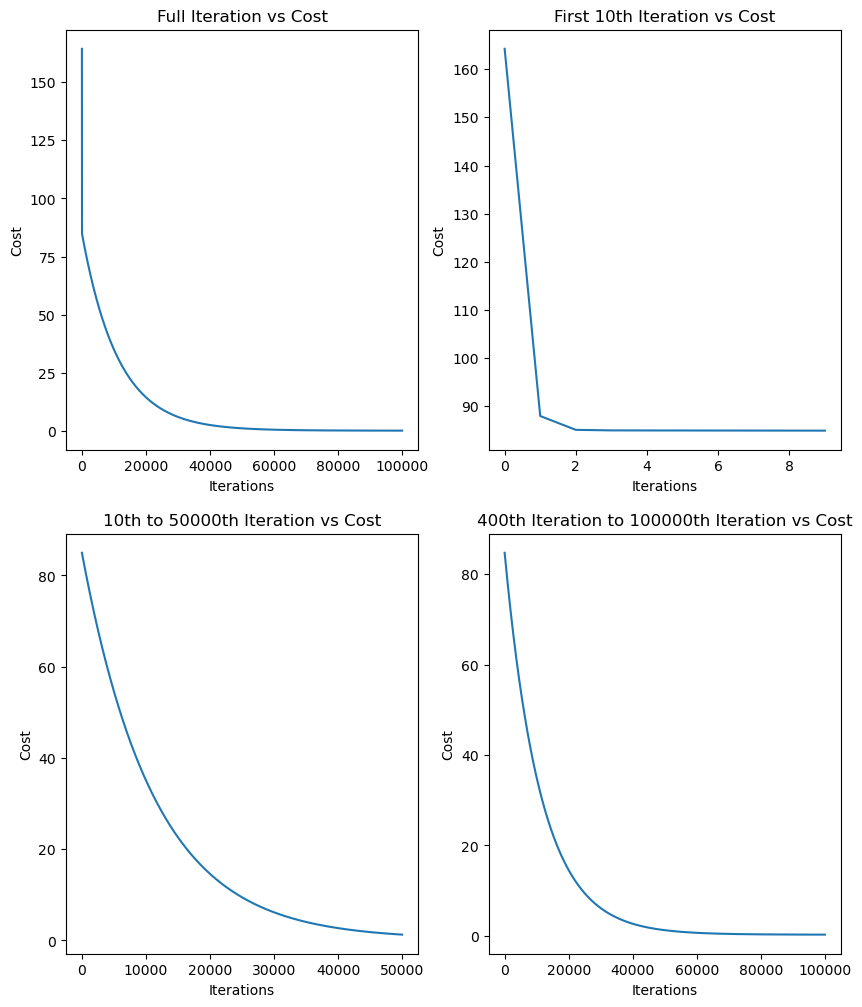

In [80]:
plt.close('all')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 12))
ax1.plot(cost_history)
ax1.set_title('Full Iteration vs Cost')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost')
ax2.plot(cost_history[:10])
ax2.set_title('First 10th Iteration vs Cost')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Cost')
ax3.plot(cost_history[10:50000])
ax3.set_title('10th to 50000th Iteration vs Cost')
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Cost')
ax4.plot(cost_history[40:100000])
ax4.set_title('400th Iteration to 100000th Iteration vs Cost')
ax4.set_xlabel('Iterations')
ax4.set_ylabel('Cost')
plt.show()

## Brief Introduction of SciKit Learn

**SciKit Learn is open source machine learning tools that we can use for Python. As student of machine learning, we are expected to to be able to setup and run our gradient descent algorithm. In practice, it is more common that we use SciKit Learn tools to perform such task. We can also use the tools to double check to see if our algorithm works.**

**As mentioned before for linear regression, SciKit Learn may not use gradient descent for linear regression. However, the `w` (a.k.a coefficient) and `b` (a.k.a intercept) may be the same. In the event that it is different, please use the coefficient to make the predictions. The predictions should be close. The reason for different coefficient may caused by how the data was adjusted or normalized, which we will learn later.**

In [81]:
# Us the following to import SciKit Learn
# When encountering error, you may not have installed the module
# Please Google the web on how to install module

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

### Test Example: Gradient Descent Function

**We use the previous multiple variable test example. We will run our gradient Descent Algorithm first.**

In [82]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]]).reshape((3,4))
y_train = np.array([460, 232, 178]).reshape((3,1))

In [83]:
b_init = 782
w_init = np.array([ 0.4, 18, -52, -25]).reshape([4,1])
alpha = 5.0e-7

In [84]:
w, b, cost_history, w_history, b_history = compute_gradient_descent(X_train, y_train, iterations = 100000, init_b=b_init, init_w = w_init,alpha = alpha, 
                                                                    printProgress=True, printProgressRate=10000)

iteration 0: cost = 1.6423e+02: weights = [[  0.34982893  17.99988503 -52.00004387 -25.001331  ]]
iteration 10000: cost = 3.5104e+01: weights = [[  0.3705065   18.00400735 -52.02694636 -25.49551993]]
iteration 20000: cost = 1.4585e+01: weights = [[  0.37854099  18.00685452 -52.0448019  -25.81241206]]
iteration 30000: cost = 6.1536e+00: weights = [[  0.38369055  18.00889605 -52.05685308 -26.01551883]]
iteration 40000: cost = 2.6884e+00: weights = [[  0.38699076  18.01042087 -52.06518275 -26.1456853 ]]
iteration 50000: cost = 1.2640e+00: weights = [[  0.3891055   18.01161421 -52.0711261  -26.2290946 ]]
iteration 60000: cost = 6.7836e-01: weights = [[  0.39046029  18.0125948  -52.07553901 -26.28253098]]
iteration 70000: cost = 4.3731e-01: weights = [[  0.39132794  18.01343876 -52.07897015 -26.31675373]]
iteration 80000: cost = 3.3789e-01: weights = [[  0.39188331  18.01419488 -52.08177123 -26.33865993]]
iteration 90000: cost = 2.9666e-01: weights = [[  0.39223851  18.01489443 -52.0841677 

<details>
<summary>
    <font size='3'><b>Expected Results</b></font>
</summary>
    <p>
    <ul>
        <li>b,w found by gradient descent</li>
        <li>b: 785.1811367994083</li>  
        <li>w: [ 0.39133535, 18.75376741, -53.36032453, -26.42131618] </li>
    </ul>
    </p> 

In [85]:
prediction(X_train,b,w)

array([[459.41809623],
       [233.09260849],
       [177.62099072]])

<details>
<summary>
    <font size='3'><b>Expected Results</b></font>
</summary>
    <p>
    <ul>
        <li>target value: 460</li>
        <li>target value: 232</li>  
        <li>target value: 178</li>
    </ul>
    </p> 

### Test Example: SciKit Learn

In [86]:
reg = LinearRegression().fit(X_train, y_train)
print('w',reg.coef_)
print('b',reg.intercept_)

w [[  0.39133535  18.75376741 -53.36032453 -26.42131618]]
b [785.1811368]


<details>
<summary>
    <font size='3'><b>Expected Results</b></font>
</summary>
    <p>
    <ul>
        <li>b,w found by gradient descent</li>
        <li>b: 785.1811367994083</li>  
        <li>w: [ 0.39133535, 18.75376741, -53.36032453, -26.42131618] </li>
    </ul>
    </p> 

In [87]:
print('y prediction',reg.predict(X_train))

y prediction [[460.]
 [232.]
 [178.]]


<details>
<summary>
    <font size='3'><b>Expected Results</b></font>
</summary>
    <p>
    <ul>
        <li>target value: 460</li>
        <li>target value: 232</li>  
        <li>target value: 178</li>
    </ul>
    </p> 

## Application of Housing Data

### Housing Price with One Feature

In [88]:
df = pd.read_csv('./data/housing_one_var.csv')
df.head()

,sqft,price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


In [89]:
x_train = df['sqft'].to_frame()
x_train.head()

,sqft
0,2104
1,1600
2,2400
3,1416
4,3000


**We need to convert sqft to thousand sqft to prevent computation overflow**

In [90]:
x_train = x_train / 1000

In [91]:
y_train = df['price'].to_frame()
y_train.head()

,price
0,399900
1,329900
2,369000
3,232000
4,539900


In [92]:
w, b, cost_history, w_history, b_history = compute_gradient_descent(x_train, y_train, iterations =10000, alpha = 0.01)

best w [[134525.3448]]
best b 71270.3637


In [93]:
reg = LinearRegression().fit(x_train, y_train)
print('w',reg.coef_)
print('b',reg.intercept_)

w [[134525.28772024]]
b [71270.49244873]


### Housing Price with Two Features

In [94]:
df2 = pd.read_csv('./data/housing_two_var.txt')
df2.head()

,sqft,rm,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [95]:
y2_train = df2['price']
y2_train.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: price, dtype: int64

In [96]:
X2_train = df2[['sqft','rm']]
X2_train.head()

,sqft,rm
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


**We need to convert sqft to thousand sqft to prevent computation overflow**

In [97]:
X2_train = X2_train * np.array([0.001,1]).reshape((1,2))
X2_train.head()

,sqft,rm
0,2.104,3.0
1,1.600,3.0
2,2.400,3.0
3,1.416,2.0
4,3.000,4.0


In [98]:
w, b, cost_history, w_history, b_history = compute_gradient_descent(X2_train, y2_train, iterations = 200000, alpha = 0.01)

best w [[139210.674 ]
 [ -8738.0191]]
best b 89597.9095


In [99]:
reg = LinearRegression().fit(X2_train, y2_train)
print('w',reg.coef_)
print('b',reg.intercept_)

w [139210.67401763  -8738.01911233]
b 89597.90954279745


**Our coeficient is very close to SciKit Learn**

In [100]:
%%timeit -r 1 -n 1
compute_gradient_descent(X2_train, y2_train, iterations = 200000, alpha = 0.01)
# timeit do not allow comment on first line, also do not capture return

best w [[139210.674 ]
 [ -8738.0191]]
best b 89597.9095
6.82 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [101]:
%%timeit -r 1 -n 1
LinearRegression().fit(X2_train, y2_train)
# timeit do not allow comment on first line, also do not capture return

2.03 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


**Scikit Learn is faster, most likely using normal equation to solve the linear regression problem.**

## Additional Note in Matrix Computation

<div class="alert alert-block alert-info">

**Matrix computation is faster because the system do not use the CPU to compute the matrix computation, instead it utilized the Math co-processor to perform the computation in parallel. For high intensive matrix computation, Math co-processor may not be enough. This is where the video processor in the video card came into the play. This is also why Nvidia excels in the field of AI.** 
</div>

## End of Note 9